<a href="https://colab.research.google.com/github/Yonatan-Awlachew/DataMining-Project/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

Importing Librarys and Read Csv File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict


df = pd.read_csv('Preprocessed_Data.csv')
df.head()

,TIME_PERIOD,Crop_Production(1000 ha),Meat_Production(1000 tonnes),Milk_Production(1000 tonnes),Crop_Economy(Million euro),Milk_Economy(Million euro),Animal_Economy(Million euro),Agriculture_Subsidies(Million euro),Agriculture_Economy(Million euro),Total_Production,Subsidies_to_Economy_Ratio,Production_to_Economy_Ratio,Impact_of_Economy,Economic_Impact_Category
0,1982,-1.026509,0.394887,-1.667932,-1.432852,-1.384831,-1.727769,0.052866,-2.078044,-1.235872,0.900352,-1.119119,1.345445,High
1,1983,-1.025598,0.614417,-1.587618,-0.052419,-1.211111,-1.454735,0.496916,-0.932479,-1.212976,0.902994,-1.200005,1.425948,High
2,1984,-1.034086,0.810444,-1.551164,-1.227956,-1.148127,-1.431616,0.071913,-1.797641,-1.208086,0.798368,-1.113891,1.392387,High
3,1985,-1.074827,0.903009,-1.366494,-1.136323,-1.035734,-1.489193,0.061573,-1.733460,-1.202150,0.758616,-1.113205,1.414799,High
4,1986,-1.070383,0.758506,-1.357681,-0.829536,-1.117551,-1.774591,0.110005,-1.561286,-1.199760,0.739411,-1.126970,1.108548,High


## Making Ready by Defining Feature and Target Variable

Define features and target variable


In [2]:
X = df[['Subsidies_to_Economy_Ratio', 'Production_to_Economy_Ratio', 'Impact_of_Economy']]
y = df['Economic_Impact_Category']

Encode the target variable

In [3]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Split data into 70%  training and 30% testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Defining scoring metrics

In [5]:
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

Defining class labels

In [6]:
class_labels = {0: 'Low', 1: 'Medium', 2: 'High'}

## Support Vector Machine (SVM)

Initialize Support Vector Machine model

In [7]:
model = SVC(probability=True)

Cross Validation and Evaluation of Scoring Metrics

In [8]:
cv_results = {}

for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
    cv_results[metric_name] = scores
    print(f"{metric_name.capitalize()} Scores: {scores}")
    print(f"Average {metric_name.capitalize()}: {scores.mean():.2f} ± {scores.std():.2f}")

Accuracy Scores: [0.77777778 1.         0.875      1.         0.5       ]
Average Accuracy: 0.83 ± 0.19
Precision_weighted Scores: [0.80555556 1.         0.90625    1.         0.375     ]
Average Precision_weighted: 0.82 ± 0.23


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall_weighted Scores: [0.77777778 1.         0.875      1.         0.5       ]
Average Recall_weighted: 0.83 ± 0.19
F1_weighted Scores: [0.77460317 1.         0.87142857 1.         0.4       ]
Average F1_weighted: 0.81 ± 0.22


Confusion Matrix

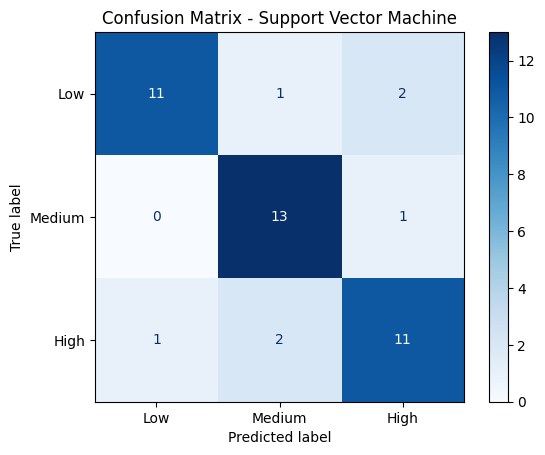

In [9]:
y_pred = cross_val_predict(model, X, y, cv=5)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[i] for i in sorted(class_labels.keys())])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

ROC Curve


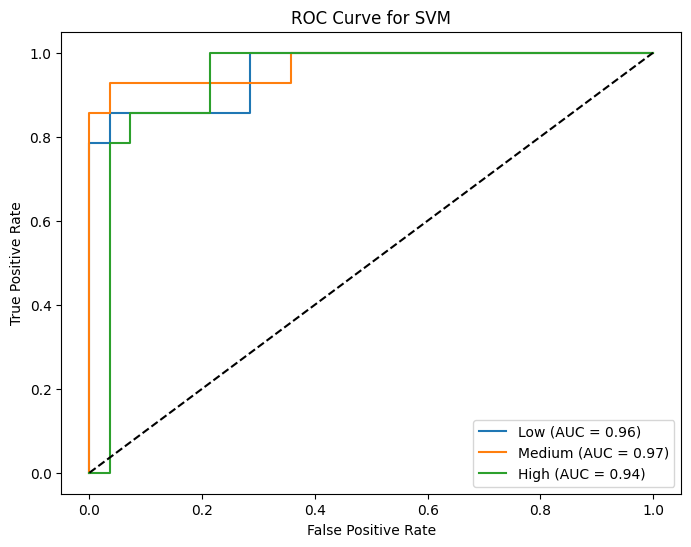

In [10]:
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
plt.figure(figsize=(8, 6))
unique_labels = sorted(np.unique(y))

for index in range(len(unique_labels)):

    current_label = unique_labels[index]

    y_binary = (y == current_label).astype(int)
    y_proba_for_label = y_proba[:, index]

    fpr, tpr, thresholds = roc_curve(y_binary, y_proba_for_label)

    auc_score = roc_auc_score(y_binary, y_proba_for_label)

    plt.plot(fpr, tpr, label=f"{class_labels[current_label]} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.show()


## Logistic Regression Model

Initialize Logistic Regression model

In [11]:
model = LogisticRegression()

Cross Validation and Evaluation of Scoring Metrics

In [12]:
cv_results = {}

for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
    cv_results[metric_name] = scores
    print(f"{metric_name.capitalize()} Scores: {scores}")
    print(f"Average {metric_name.capitalize()}: {scores.mean():.2f} ± {scores.std():.2f}")


Accuracy Scores: [0.77777778 0.77777778 1.         1.         0.75      ]
Average Accuracy: 0.86 ± 0.11
Precision_weighted Scores: [0.80555556 0.86666667 1.         1.         0.85      ]
Average Precision_weighted: 0.90 ± 0.08
Recall_weighted Scores: [0.77777778 0.77777778 1.         1.         0.75      ]
Average Recall_weighted: 0.86 ± 0.11
F1_weighted Scores: [0.77460317 0.75       1.         1.         0.71875   ]
Average F1_weighted: 0.85 ± 0.12


Confusion Matrix

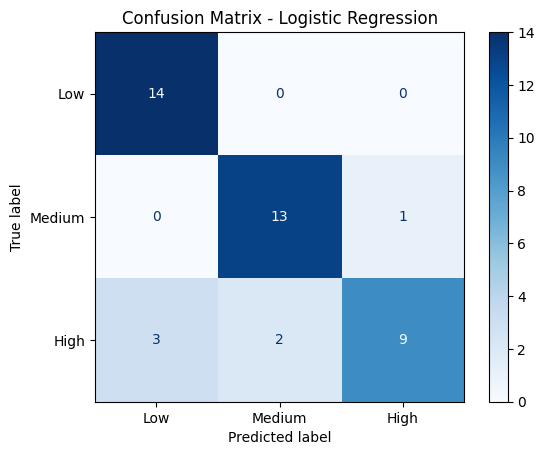

In [13]:
y_pred = cross_val_predict(model, X, y, cv=5)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[i] for i in sorted(class_labels.keys())])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

ROC Curve


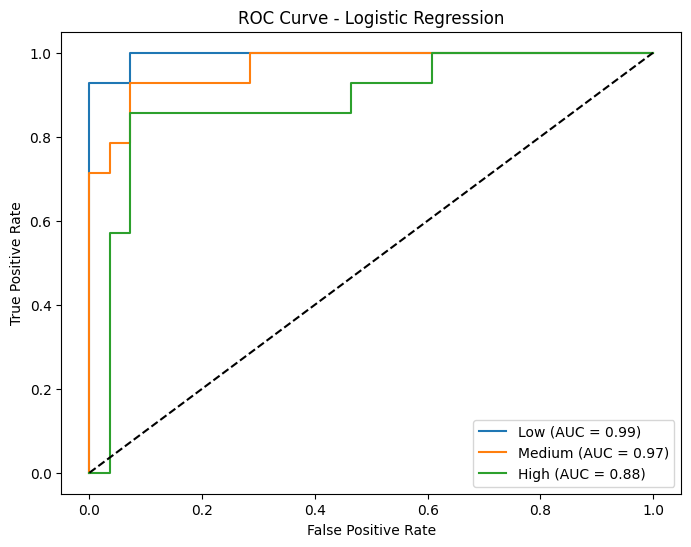

In [14]:
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
plt.figure(figsize=(8, 6))
unique_labels = sorted(np.unique(y))

for index in range(len(unique_labels)):

    current_label = unique_labels[index]

    y_binary = (y == current_label).astype(int)
    y_proba_for_label = y_proba[:, index]

    fpr, tpr, thresholds = roc_curve(y_binary, y_proba_for_label)

    auc_score = roc_auc_score(y_binary, y_proba_for_label)

    plt.plot(fpr, tpr, label=f"{class_labels[current_label]} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


## K-Nearest Neighbors (KNN) Model


Initialize K-Nearest Neighbors model

In [15]:
model = KNeighborsClassifier()

Cross Validation and Evaluation of Scoring Metrics

In [16]:
cv_results = {}

for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
    cv_results[metric_name] = scores
    print(f"{metric_name.capitalize()} Scores: {scores}")
    print(f"Average {metric_name.capitalize()}: {scores.mean():.2f} ± {scores.std():.2f}")


Accuracy Scores: [0.88888889 1.         0.75       1.         0.5       ]
Average Accuracy: 0.83 ± 0.19
Precision_weighted Scores: [0.91666667 1.         0.85       1.         0.53571429]
Average Precision_weighted: 0.86 ± 0.17


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall_weighted Scores: [0.88888889 1.         0.75       1.         0.5       ]
Average Recall_weighted: 0.83 ± 0.19
F1_weighted Scores: [0.88571429 1.         0.71875    1.         0.4125    ]
Average F1_weighted: 0.80 ± 0.22


Confusion Matrix

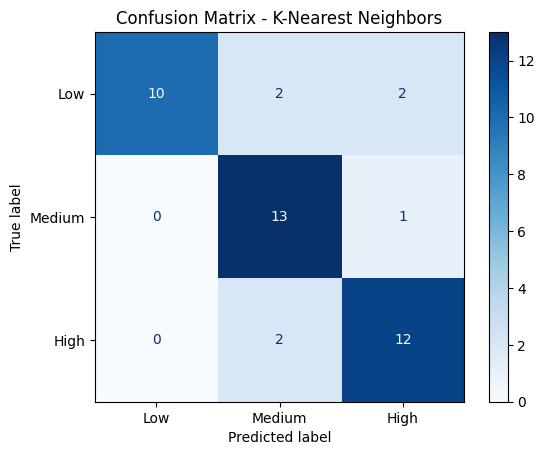

In [17]:
y_pred = cross_val_predict(model, X, y, cv=5)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[i] for i in sorted(class_labels.keys())])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

ROC Curve


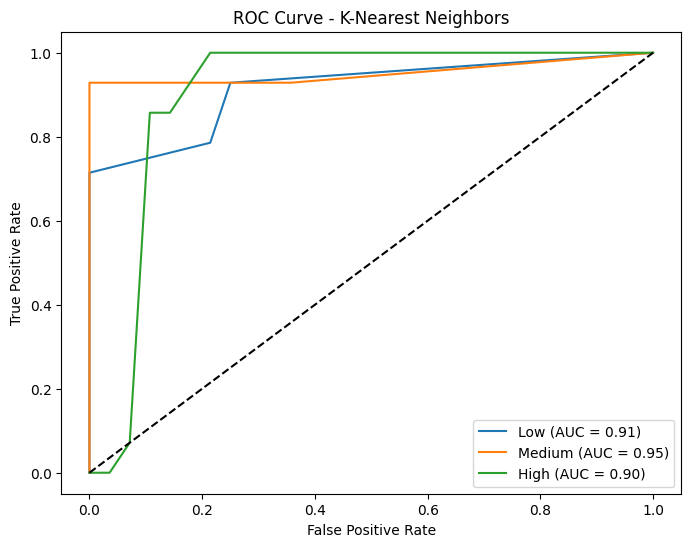

In [18]:
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
plt.figure(figsize=(8, 6))
unique_labels = sorted(np.unique(y))

for index in range(len(unique_labels)):

    current_label = unique_labels[index]

    y_binary = (y == current_label).astype(int)
    y_proba_for_label = y_proba[:, index]

    fpr, tpr, thresholds = roc_curve(y_binary, y_proba_for_label)

    auc_score = roc_auc_score(y_binary, y_proba_for_label)

    plt.plot(fpr, tpr, label=f"{class_labels[current_label]} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - K-Nearest Neighbors")
plt.legend()
plt.show()


## Naive Bayes Model


Initialize Naive Bayes model

In [19]:
model = GaussianNB()

Cross Validation and Evaluation of Scoring Metrics

In [20]:
cv_results = {}

for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
    cv_results[metric_name] = scores
    print(f"{metric_name.capitalize()} Scores: {scores}")
    print(f"Average {metric_name.capitalize()}: {scores.mean():.2f} ± {scores.std():.2f}")


Accuracy Scores: [0.88888889 1.         0.75       0.875      0.75      ]
Average Accuracy: 0.85 ± 0.09
Precision_weighted Scores: [0.91666667 1.         0.79166667 0.90625    0.6       ]
Average Precision_weighted: 0.84 ± 0.14
Recall_weighted Scores: [0.88888889 1.         0.75       0.875      0.75      ]
Average Recall_weighted: 0.85 ± 0.09
F1_weighted Scores: [0.88571429 1.         0.75       0.86309524 0.65625   ]
Average F1_weighted: 0.83 ± 0.12


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix

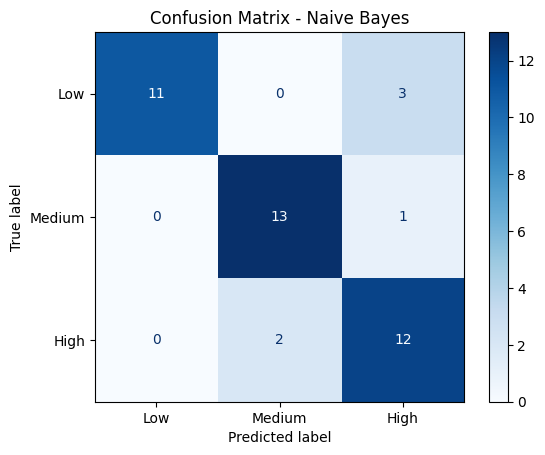

In [21]:
y_pred = cross_val_predict(model, X, y, cv=5)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[i] for i in sorted(class_labels.keys())])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

ROC Curve


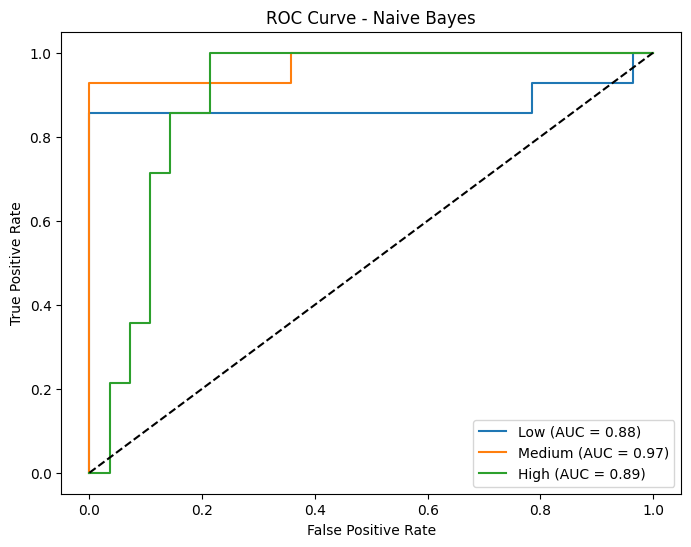

In [22]:
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
plt.figure(figsize=(8, 6))
unique_labels = sorted(np.unique(y))

for index in range(len(unique_labels)):

    current_label = unique_labels[index]

    y_binary = (y == current_label).astype(int)
    y_proba_for_label = y_proba[:, index]

    fpr, tpr, thresholds = roc_curve(y_binary, y_proba_for_label)

    auc_score = roc_auc_score(y_binary, y_proba_for_label)

    plt.plot(fpr, tpr, label=f"{class_labels[current_label]} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()
